# This Note book creates a polygon (shape file) of the region of interest. 
# It takes input either the location details or the coordinates of the polygon

# Method 1
## Input: It takes input as a location details

## environment used
- c:\Users\Hashim>conda info --envs |find "*" | find "osm_gpd"
- osm_gpd               *  C:\ProgramData\anaconda3\envs\osm_gpd

In [19]:
#suppress the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import osmnx as ox
import geopandas as gpd

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import matplotlib.pyplot as plt



In [20]:
place_name = "Center City Philadelphia, PA, USA"

In [21]:
area = ox.geocode_to_gdf(place_name)

## area details (coordinates, location details)

In [22]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-75.18743 39.94656, -75.16546 39.943...",39.965669,39.940478,-75.129683,-75.187435,1564737,relation,13658130,39.95095,-75.157484,boundary,administrative,20,0.416014,suburb,Center City,"Center City, Philadelphia, Philadelphia County..."


## Displaying area

<Axes: >

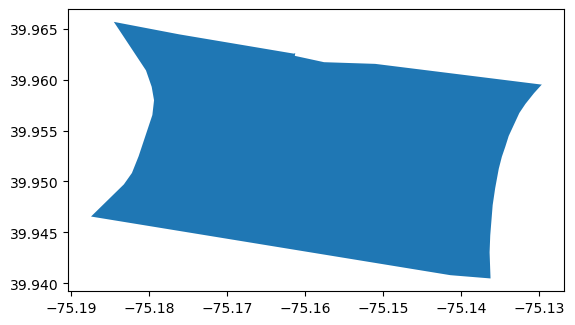

In [23]:
area.plot()

## extracting the building information in the region

In [24]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\

amenity                    geometry     addr:city  \
element_type osmid                                                         
node         367958244     NaN  POINT (-75.15013 39.95091)  Philadelphia   
             367958245     NaN  POINT (-75.14456 39.94715)           NaN   
             367958246     NaN  POINT (-75.14406 39.94684)           NaN   
             367958249     NaN  POINT (-75.16879 39.94761)           NaN   
             367967237     NaN  POINT (-75.14687 39.94576)           NaN   

                       addr:housenumber addr:postcode addr:state  \
element_type osmid                                                 
node         367958244              525         19106         PA   
             367958245              NaN           NaN         PA   
             367958246              NaN           NaN         PA   
             367958249              NaN           NaN         PA   
             367967237              NaN           NaN         PA   

                          addr:street building ele  \
element_type osmid                                   
node         367958244  Market Street      yes  10   
             367958245            NaN      yes   6   
             367958246            NaN      yes   6   
             367958249            NaN      yes  12   
             367967237            NaN      yes   6   

                                              name  ... microbrewery boundary  \
element_type osmid                                  ...                         
node         367958244       Liberty Bell Pavilion  ...          NaN      NaN   
             367958245                 City Tavern  ...          NaN      NaN   
             367958246  Old Bookbinders Restaurant  ...          NaN      NaN   
             367958249   Colonial Dames of America  ...          NaN      NaN   
             367967237                 Powel House  ...          NaN      NaN   

                       ownership protected protection_title was:tourism  \
element_type osmid                                                        
node         367958244       NaN       NaN              NaN         NaN   
             367958245       NaN       NaN              NaN         NaN   
             367958246       NaN       NaN              NaN         NaN   
             367958249       NaN       NaN              NaN         NaN   
             367967237       NaN       NaN              NaN         NaN   

                       seasonal opening_date ways type  
element_type osmid                                      
node         367958244      NaN          NaN  NaN  NaN  
             367958245      NaN          NaN  NaN  NaN  
             367958246      NaN          NaN  NaN  NaN  
             367958249      NaN          NaN  NaN  NaN  
             367967237      NaN          NaN  NaN  NaN  

[5 rows x 202 columns]

## Displaying the building information

C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


<Axes: >

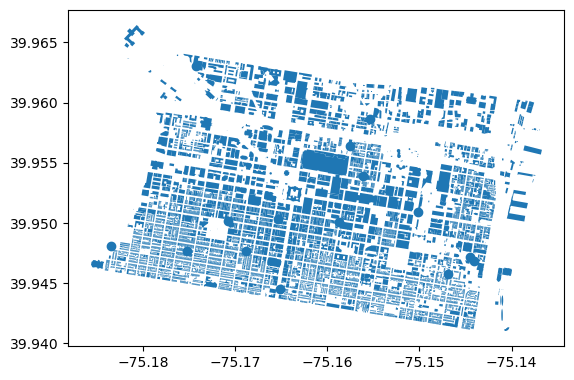

In [7]:
buildings.plot()

## Saving the area polygon into ESRI shape file

In [8]:
area.to_file(r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly.shp")

C:\Users\Hafeez\AppData\Local\Temp\ipykernel_50772\3072140662.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  area.to_file(r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly.shp")
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


# Method 2
## Input:  It takes input as coordinates of the polygon

C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


<Axes: >

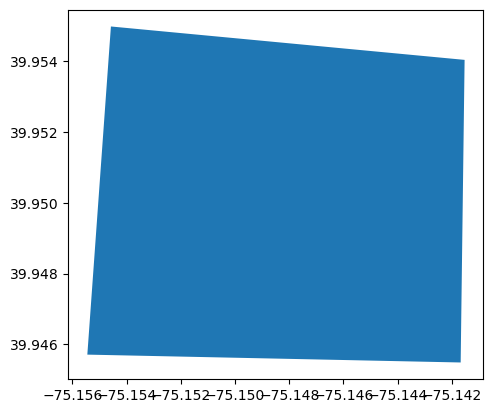

In [9]:
# Define a list of coordinate pairs
coordinates = [[-75.155444417109,39.9457112547859], 
               [-75.1545748232825,39.9549885451273], 
               [-75.1415309158856,39.9540442078262],
               [-75.14167584819,39.9454890288091]]           

# Construct a Shapely polygon using the list of coordinates
ply_coord = Polygon(coordinates)

# Create a dictionary to hold the necessary attributes and geometry column
df = {'Attribute': ['name1'], 'geometry': [ply_coord]}

# Convert the Shapely object into a Geodataframe and assign a CRS
poly = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Visualize the created polygon
poly.plot()

## Saving the polygon into ESRI shape file

In [10]:
poly.to_file(r"c:/Users/Hashim/DIS-9901A/DigitalTwinData/data/osm_gpd/city_center_philly_polygon.shp")

C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
C:\ProgramData\anaconda3\envs\osm_gpd\Lib\site-packages\pandas\core\frame.py:717: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
